In [14]:
%matplotlib inline
import random, math, pylab
import os
import numpy as np
import matplotlib.pyplot as plt
from numpy import array
from pylab import figure, xticks, yticks
import socket
from math import pi, sqrt

# Introduction

This homework is divided into three parts. In the first part, you estimate $\pi$ by using a direct-sampling
algorithm and determine the statistical error of your numerical calculation. In the second part, you
again estimate $\pi$, but this time for a Markov-chain algorithm. The precision of the result depends on
the rejection rate of the algorithm, which itself depends on the step size $\delta$. You will see that performance is
best when $\delta$ is chosen such that about half of the proposed moves are accepted. This is called the "1/2
rule". It is an approximate rule, a rule of thumb, not a mathematical law. Finally, in the third part, you
quantify the error associated with the Markov-chain algorithm using the bunching algorithm.
You will create plots to analyze the output of your programs graphically. Please take special care that the axes in your plots are labeled correctly and that they show the data that is asked for.

# A - Direct sampling algorithm

## A1

Run the direct-sampling algorithm provided below, and convince yourself that for large enough values of n_trials, the output of each of the n_runs runs converges to $\pi=3.1415926\ldots$. Determine the root mean square (rms) error, given by:

$$
\text{rms_error} = \sqrt{\dfrac{1}{\text{n_runs}} \sum\limits_{i=0}^{\text{n_runs} - 1} (\pi_i^{\text{est}} - \pi)^2},
$$
where $\pi_i^{\text{est}}$ is the output of each single run. Note that this gives the actual precision of your calculation, as you compare with the exact mathematical value of $\pi$. Take n_runs=500 and modify the code in order to compute the rms error according to the above formula for n_trials = $2^4, 2^5,...,2^{12}$. Produce a log-log-plot of the error as a function of n_trials.

As a help for students beginning with python, the modified code is provided below. 

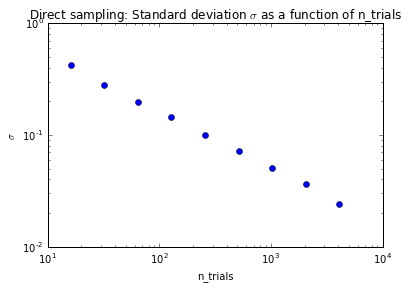

In [15]:
def direct_pi(N):
    n_hits = 0
    for i in range(N):
        x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
        if x ** 2 + y ** 2 < 1.0:
            n_hits += 1
    return n_hits
 
n_runs = 500
n_trials_list = []
sigmas = []
for poweroftwo in range(4, 13):
    n_trials = 2 ** poweroftwo
    n_trials_list.append(n_trials)
    sigma = 0.0
    for run in range(n_runs):
        pi_est = 4.0 * direct_pi(n_trials) / float(n_trials)
        sigma += (pi_est - math.pi) ** 2
    sigmas.append(math.sqrt(sigma / (n_runs)))
    

pylab.plot(n_trials_list, sigmas, 'o')
pylab.gca().set_xscale('log')
pylab.gca().set_yscale('log')
pylab.xlabel('n_trials')
pylab.ylabel('$\sigma$')
pylab.title('Direct sampling: Standard deviation $\sigma$ as a function of n_trials')
pylab.savefig('direct_sampling_statistical_error.png')
pylab.show()

## A2


By referring to your figure, show that the rms error is proportional to $n_{\text{trials}}^{-\alpha}$ and estimate $\alpha$. Enter the empirical value of $\alpha$ in a new cell below.

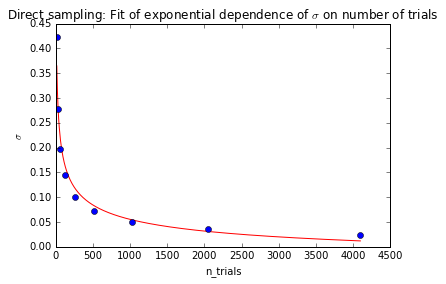

alpha: -0.299974520756


In [16]:
from scipy.optimize import leastsq

## function of line
func     = lambda par, x   : x**par[0]+par[1];
## error function used for leas square fitting
errfunc  = lambda par, x, y: func(par, x) - y;

parInitGuess = (1.0,0.0)

x=np.array(n_trials_list)
y=np.array(sigmas)

res, b = leastsq(errfunc, parInitGuess[:], args=(x,y));

x1=np.linspace(n_trials_list[0],n_trials_list[len(n_trials_list)-1],500);
y1=func(res,x1)
pylab.plot(x1,y1,'r-')
pylab.plot(n_trials_list, sigmas, 'o')
pylab.xlabel('n_trials')
pylab.ylabel('$\sigma$')
pylab.title('Direct sampling: Fit of exponential dependence of $\sigma$ on number of trials')
pylab.show()

print "alpha: "+str(res[0])

# B - Markov chain algorithm and the "1/2 rule of thumb"

## B1

Run the Markov-chain algorithm provided below and convince yourself that for large enough n_trials, the output of each of the n_runs runs approaches the value of $\pi$. Then, set the number of runs to n_runs = 500 and the number of trials to n_trials = 1000. Modify the program so that it calculates the acceptance ratio: the number of the
moves that are not rejected, divided by n_trials. Run the new program and compute the acceptance ratio
for the following values of $\delta$ ("delta" in the the method "markov_pi"): $\delta=0.1, \delta=0.2, \delta=0.3,..., \delta=5.0$ . Plot the computed acceptance ratio as a function of $\delta$ Use linear scaling on both axes.

In [17]:
def markov_pi(N, delta): 
    x, y = 1.0, 1.0
    n_hits = 0
    acceptedTririals = 0
    
    for i in range(N):
        del_x, del_y = random.uniform(-delta, delta),random.uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
            x, y = x + del_x, y + del_y
            acceptedTririals += 1;
        if x**2 + y**2 < 1.0: n_hits += 1
    return [4.0*n_hits/float(N), float(acceptedTririals)/float(N)]

n_runs = 500
n_trials = 1000
## make list of $\delta$-s 
delta_list = [0.1+0.1*i for i in xrange(50)]
#print delta_list

acc = [] # list of mean acceptnces for different $\delta$-s
rms_err = [] # list of mean rms errors for different $\delta$-s

for delta in delta_list:
    acceptance = 0.0
    suma = 0.0
    for run in range(n_runs):
        pi_est,acc_i = markov_pi(n_trials, delta)
        acceptance += acc_i;
        suma += (pi_est - math.pi) ** 2
    rms_err.append(math.sqrt(suma / (n_runs)))
    acc.append(acceptance/n_runs)


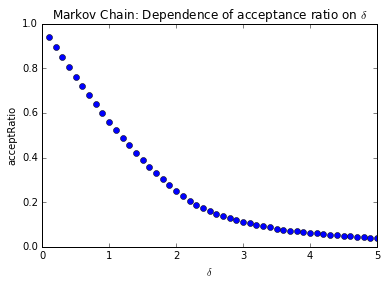

In [18]:
pylab.plot(delta_list, acc, 'o')
pylab.xlabel('$\delta$')
pylab.ylabel('acceptRatio')
pylab.title('Markov Chain: Dependence of acceptance ratio on $\delta$')
pylab.show()

## B2
The "1/2 thumb rule" predicts that the best performance of the Markov Chain Monte Carlo algorithm is
for an acceptance ratio of approximately 1/2: half the moves are accepted, and half of them are rejected.
In (B1) you computed the acceptance ratios for $\delta=0.1, \delta=0.2, \delta=0.3,..., \delta=5.0$ (Note that $\delta$ can be larger than the box). Find the $\delta$-interval in which the acceptance ratio equals 1/2 with a $10^{-1}$ precision.

Interval is rougly $\delta$ $\in$ [1.0, 1.2]

# B3
We now study the performance of the Markov chain algorithm as a function of $\delta$. Again, use n_runs = 500 and
n_trials = 1000. Modify the program so that it computes the rms error, exactly as we did for the direct sampling algorithm, using again the formula

$$
\text{rms_error} = \sqrt{\dfrac{1}{\text{n_runs}} \sum\limits_{i=0}^{\text{n_runs} - 1} (\pi_i^{\text{est}} - \pi)^2},
$$

for values of $\delta=0.1, \delta=0.2, \delta=0.3,..., \delta=5.0$. Plot the rms error as a function of $\delta$ . Note
that the rms error gives the actual precision of your calculation, as you compare with the exact mathematical value of $\pi$.

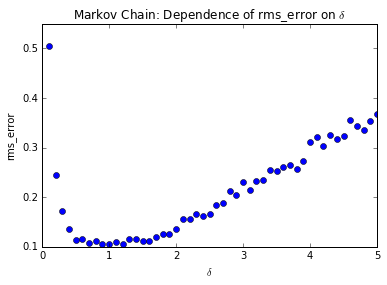

In [19]:
pylab.plot(delta_list, rms_err, 'o')
pylab.xlabel('$\delta$')
pylab.ylabel('rms_error')
pylab.title('Markov Chain: Dependence of rms_error on $\delta$')
pylab.show()

# B4
Comment shortly
1. whether the acceptance rate 1/2 indeed gives better accuracy than other choices, by referring to your figures, and compare it to the performance of the algorithm for other values of $\delta$.
2. why $\delta \simeq 0$ and $\delta \to \infty$ give worse results than the intermediate value of δ that corresponds to the 1/2 rule.

## Answers:
(1) In interval where acceptance is roughly equal to 0.5 actual rms_error has its minim in plot of dependence of rms_error on $\delta$. So that if we chose $\delta$ such that acceptance $\approx$ 0.5, we get optimal performance and also minimal rms_error.

(2) For $\delta \simeq 0$ each step is so small that sampling of whole space is too slow and many of acceptable positions in sampled space are not visited, so that in finite number of steps only small fraction of space is sampled and result given by sampling is highly biased based on initial position. (starting from inside the circle is biased toward larger estimate of $\pi$ while starting outside the circle is biased to lower estimate of $\pi$)

On the other hand, for $\delta \to \infty$ probability of having step size larger then size of sampled space increase so that more and more trials are rejected and "effective" number of trials (trials that count to estimate of $\pi$) significantly decrease.

# C The bunching algorithm

Real Markov-chain simulations present two differences with respect to what we presented in section B:
1. It is not possible to compare the numerical data to the exact result, here $\pi = 3.1415\ldots$, as we simply
do not know the result. In the rms error, in which we have up to now compared the output of our calculation with the known exact value $\pi = 3.1415\ldots...$, we must therefore replace the mathematical value $\pi$ by an
estimate.
2. It is usually not possible to have many independent runs (it is usually not possible to put n_runs $>> 1$ in our example) that each evolve for very long times (it is usually not possible to set n_trials=1000 in our example). One therefore needs to estimate the error from a single run.

For independent data $x_0, x_1, x_2....., x_{(\text{n_trials} -1)}$ such as those produced by the direct sampling algorithm, this is easy, and the error is given by
$$
\text{error} = \dfrac{<x^2> - <x>^2}{\sqrt{\text{n_trials}}},
$$
where $<x^2> = \sum\limits_i \dfrac{x_i^2}{\text{n_trials}}$  and $<x> = \sum\limits_i \dfrac{x_i}{\text{n_trials}}$.
Note that in the above error formula we no longer compare with the exact value of $\pi$ (that we do not
know), and that the $x_i$ in our example are either 0 (in the square, outside the circle) or 4 (inside the
circle).

For independent data, we expect that with a probability of roughly 0.68 (1 standard dev of the Gaussian distribution), the true expectation value of $x$, (that is, in our example $\pi = 3.1415\ldots$), is in the interval $[<x> − \text{error}, <x> + \text{error}]$ (Cf concept of "error bar").

## C1
Convince yourself that the naive error formula
$$
\text{error} = \dfrac{<x^2> - <x>^2}{\sqrt{\text{n_trials}}},
$$
**cannot** be used for Markov-chain data $x_0, x_1, x_2....., x_{\text{n_trials} -1}$. To this end, use the code snippet below (with n_trials = 2 ** 14, delta = 0.1, n_games = 100), in order to estimate the probability with which the true value of $\pi$ lies inside the naive error interval $[<x> − \text{error}, <x> + \text{error}]$. Run the code and print the necessary outputs, in order to evaluate this probability. Give your result in a new cell below.

In [20]:
def markov_pi_all_data(N, delta):
    x, y = 1.0, 1.0
    data_sum = 0.0
    data_sum_sq = 0.0
    for i in range(N):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
            x, y = x + del_x, y + del_y
        if x ** 2 + y ** 2 < 1.0:
            data_sum += 4.0
            data_sum_sq += 4.0 ** 2
    return data_sum / float(N), data_sum_sq / float(N)

n_trials = 2 ** 14
delta = 0.1
n_games = 100
inside_error_bar = 0
naive_error_sum = 0

for iteration in range(n_games):
    mean, mean_square = markov_pi_all_data(n_trials, delta)
    naive_error = math.sqrt(mean_square  - mean ** 2) / math.sqrt(n_trials)
    naive_error_sum += naive_error
    error =  abs(mean - math.pi)
    if error < naive_error: 
        inside_error_bar += 1

In [21]:
print "Probability of finding value in naive error interval: "+str(float(inside_error_bar)/float(n_games))
print "Mean naive error: "+str(float(naive_error_sum)/float(n_games))

Probability of finding value in naive error interval: 0.07
Mean naive error: 0.0128027530076


## C2 
In order to improve the error estimation for the Markov chain, the bunching algorithm uses an independent error analysis for the Markov-chain data $x_0, x_1, x_2....., x_{\text{n_trials} -1}$, but then analyzes these data again, using an independent error analysis for the data grouped in pairs $(x_0 + x_1)/2, (x_2 + x_3)/2, (x_4 + x_5)/2, .... (x_(\text{n_trials} -2) + x_(\text{n_trials} -1))/2$. This process is then repeated for several iterations, making pairs of pairs, then pairs of pairs of pairs, etc.

This very successful algorithm is implemented for a long sequence of data produced by the Markov chain algorithm (using $x_i$ = 4 for a hit, and $x_i = 0$  for a miss) in the below code. The code produces a plot of the error against the iteration number.

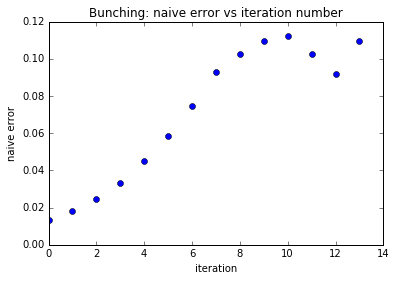

In [23]:
import random, pylab, math

def markov_pi_all_data(N, delta):
    x, y = 1.0, 1.0
    data = []
    for i in range(N):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
            x, y = x + del_x, y + del_y
        if x ** 2 + y ** 2 < 1.0:
            data.append(4.0)
        else:
            data.append(0.0)
    return data

poweroftwo = 14
n_trials = 2 ** poweroftwo
delta = 0.1
data = markov_pi_all_data(n_trials, delta)
errors  = []
bunches = []
for i in range(poweroftwo):
    new_data = []
    mean = 0.0
    mean_sq = 0.0
    N = len(data)
    while data != []:
        x = data.pop()
        y = data.pop()
        mean += x + y
        mean_sq += x ** 2 + y ** 2
        new_data.append((x + y) / 2.0 )
    errors.append(math.sqrt(mean_sq / N - (mean / N) ** 2) / math.sqrt(N))
    bunches.append(i)
    data = new_data[:]
pylab.plot(bunches, errors, 'o')
pylab.xlabel('iteration')
pylab.ylabel('naive error')
pylab.title('Bunching: naive error vs iteration number')
pylab.savefig('apparent_error_bunching.png', format='PNG')
pylab.show()

The observed error is found to increase with the iterations, and exhibits a plateau. This plateau is an
excellent estimation of the true error of the Markov-chain output. Run this program and answer three
questions:
1. Which point on the plot produced by the program of this section corresponds to the naive error of
section C1?
2. Why does the error initially increase with the iterations?
3. Why is there a plateau, at all?

## Answers:
(1) First point in plot for 0-th iteration of bunching represent naive error estimate.

(2) With increased number of iterations correlation between bunched means decrease, so that derived naive error converge to true one.

(3) Once correlation between bunched means become uncorrelated, further bunching of uncorrelated data does not change variance.